### Import Dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784',version=1,parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist.data,mnist.target
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (70000, 784)
Shape of y (70000,)


In [5]:
# X[0]

In [6]:
X[:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y[0]

'5'

why **y[0]** works **X[0]** not works?
#### mnist.data:

- Type: pandas.DataFrame (2D tabular structure with rows and columns).
- To access rows, you need to use .iloc[] (e.g., mnist.data.iloc[0]) or X[ :1].

#### mnist.target:

- Type: pandas.Series (1D structure similar to a list).
- You can directly access elements by index (e.g., mnist.target[0]).

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

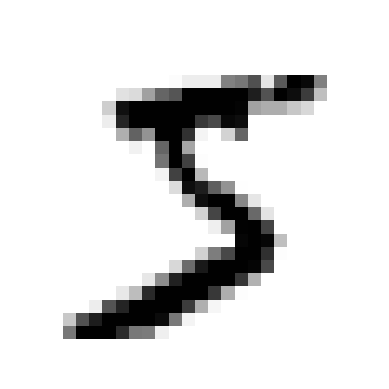

In [9]:
digit_n = X.iloc[0].values
digit_img=digit_n.reshape(28,28)
plt.imshow(digit_img,cmap='binary')
plt.axis('off')

In [10]:
y[0]

'5'

In [11]:
type(y[0])

str

 Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer

In [12]:
import numpy as np

In [13]:
y= y.astype(np.uint8)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=0)

In [16]:
y_train= y_train.astype(np.uint8)
y_test= y_test.astype(np.uint8)

### Training the Binary classification

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5.

#### Training by Stochastic Gradient Decent

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
np.unique(y_test_5)

array([False,  True])

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [20]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([digit_n])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Performance Measures

#### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score 
CVS =cross_val_score(sgd_clf, X_train, y_train_5, cv=7,scoring="accuracy") 
CVS

array([0.9636, 0.9616, 0.9344, 0.9588, 0.9684, 0.948 , 0.9384])

In [23]:
np.mean(CVS)

0.9533142857142857

In [24]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=7)
y_train_pred

array([False, False, False, ..., False, False, False])

#### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred) 

array([[15422,   504],
       [  313,  1261]], dtype=int64)

#### Precision and Recall

In [28]:
from sklearn.metrics import precision_score,recall_score
precision = precision_score(y_train_5,y_train_pred)
precision

0.7144475920679887

In [29]:
recall = recall_score(y_train_5,y_train_pred)
recall

0.8011435832274459

#### F1 Score [harmonic mean of precision and recall]

In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5,y_train_pred)
f1

0.7553159628631326

####  Precision/Recall Trade-off

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function") 
# method="decision_function" returns decision scores instead of binary labels, which is useful for performance metrics like ROC-AUC.

In [33]:
from sklearn.metrics import precision_recall_curve
p , r, thresh = precision_recall_curve(y_train_5,y_scores)

Text(0.5, 1.0, 'Precision-Recall Tradeoff')

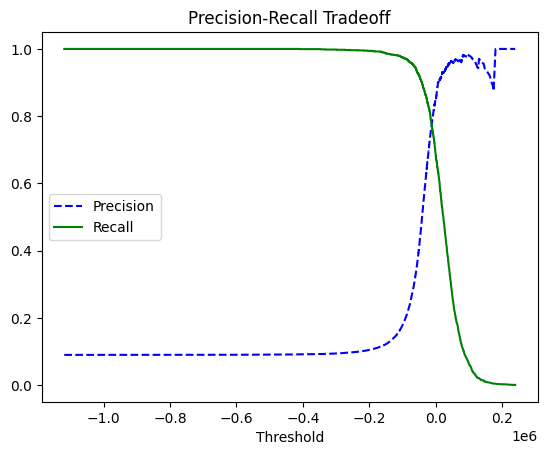

In [48]:
plt.plot(thresh, p[:-1], "b--", label="Precision") 
plt.plot(thresh, r[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision-Recall Tradeoff")

Text(0.5, 1.0, 'Precision versus recall')

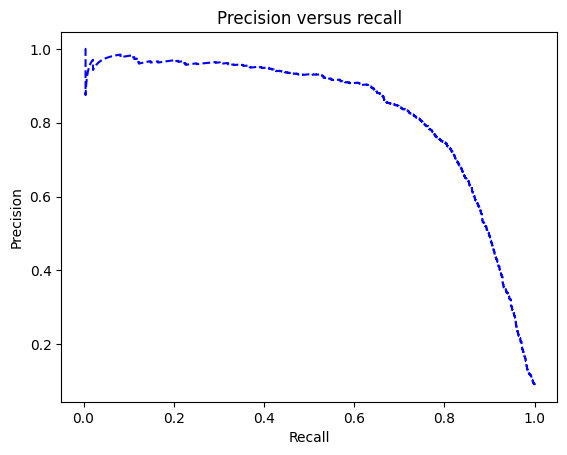

In [45]:
plt.plot(r[:-1], p[:-1], "b--", label="Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision versus recall")

####  The ROC Curve

In [49]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


Text(0.5, 1.0, 'ROC curve for SGD')

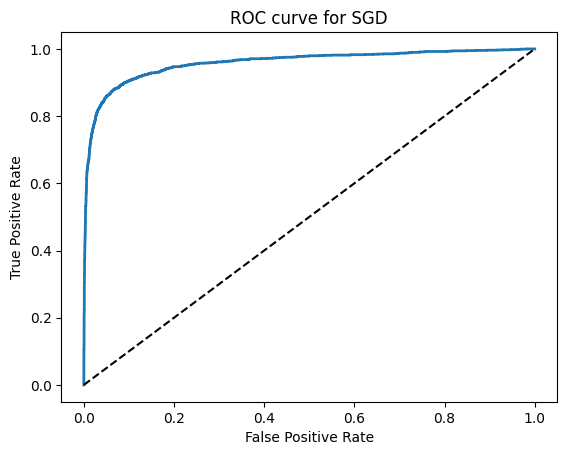

In [57]:
plt.plot(fpr, tpr, linewidth=2, label=None) 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for SGD")

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9583394833889459

#### Training By Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier 
forest_clf = RandomForestClassifier(random_state=42) 
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


#### Roc curve for Random forest

In [53]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Text(0.5, 1.0, 'ROC curve for SGD and ROC curve for Random Forest')

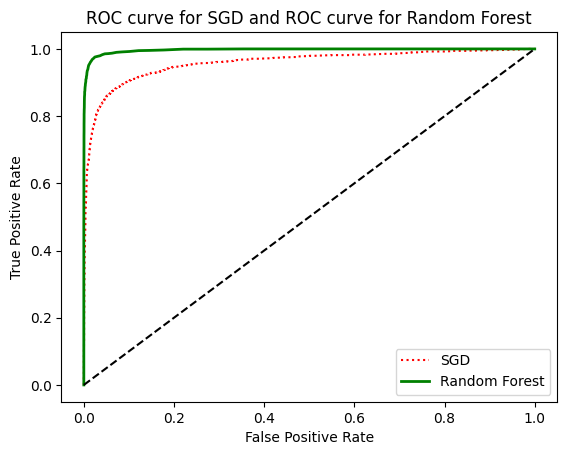

In [60]:
plt.plot(fpr, tpr, "r:", label="SGD") 
plt.plot(fpr_forest, tpr_forest,"g", linewidth=2, label="Random Forest") 
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for SGD and ROC curve for Random Forest")

In [55]:
roc_auc_score(y_train_5,y_scores_forest)

0.9968701535899597

### Multiclass Classification

In [61]:
from sklearn.svm import SVC 
svm_clf = SVC() 
svm_clf.fit(X_train, y_train) # y_train, not y_train_5 
svm_clf.predict([digit_n])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)